## Chapter 3: Neural Network

> ### **3.2** 활성화 함수
>> ##### step function

In [1]:
# step function
def step_function(x):
    if x>0:
        return 1
    else:
        return 0

step_function(3)

1

In [10]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
print(x)

y = x>0
print(y)

print(y.astype(np.int))

[-1.  1.  2.]
[False  True  True]
[0 1 1]


/var/folders/tz/r67lvvbd1snd1tps26_tv6hh0000gn/T/ipykernel_8971/103660353.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(y.astype(np.int))


In [9]:
# step function, numpy array argument
def step_function(x):
    y = x>0
    return y.astype(np.int)

print(step_function(x))

[0 1 1]


/var/folders/tz/r67lvvbd1snd1tps26_tv6hh0000gn/T/ipykernel_8971/3421200715.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


/var/folders/tz/r67lvvbd1snd1tps26_tv6hh0000gn/T/ipykernel_8971/1884667470.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0, dtype=np.int)


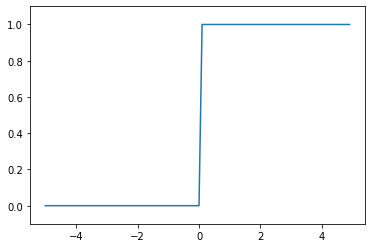

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

>> ##### sigmoid function

In [13]:
import numpy as np

# sigmoid function, numpy broadcast
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

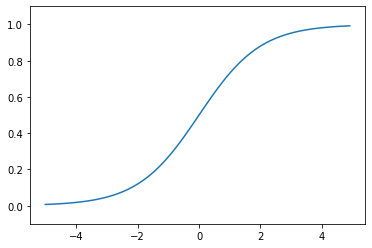

In [14]:
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

>> ##### ReLU function

In [18]:
import numpy as np

# ReLU function
def relu(x):
    return np.maximum(0,x)

x = 0.12
relu(x)

0.12

> ### **3.3** 다차원 배열의 계산

In [20]:
import numpy as np

# 1차원 배열
A = np.array([1,2,3,4])

print(A)
print(np.ndim(A))   # 배열의 차원수
print(A.shape)    # 배열의 모양, 튜플 반환

[1 2 3 4]
1
(4,)


In [22]:
# 2차원 배열, Matrix
B = np.array([[1,2], [3,4], [5,6]])

print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


![Matirx](pic/matrix.png)

>> ##### 행렬의 곱
>> ![Matirx_product](pic/matrix_product.png)

In [32]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

print(A.shape)
print(B.shape)
# np.dot(A,B) != np.dot(B,A)
print(np.dot(A,B))
print(np.dot(B,A))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


![Matirx_dot product](pic/matirx_dot_product.png)
![Matirx_dot product](pic/matrix_vector_product.png)

In [33]:
A = np.array([[1,2], [3,4], [5,6]])
B = np.array([7,8])

print(A.shape)
print(B.shape)
print(np.dot(A,B))

(3, 2)
(2,)
[23 53 83]


>> ##### 신경망에서의 행렬 곱
>> ![neural_network](matrix_product_on_neural_network.png)

In [34]:
X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])
Y = np.dot(X,W)

print(X.shape)
print(W.shape)

print(Y)
print(Y.shape)


(2,)
(2, 3)
[ 5 11 17]
(3,)


> ### **3.4** 3층 신경망 구현하기
>> ![3layer_neural network](3layer_neural_network.png)
>> ![3layer_neural network](표기법.png)

>> ##### 각 층의 신호 전달 구현하기
>>![delivery](delivery.png)
>>![calculation](calculation.png)

In [35]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1)+B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


![activate_function](activate_function.png)

In [36]:
# 활성화 함수 = sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


![delivery_1-2](delivery_1-2.png)

In [38]:
W2 = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2)+B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)


(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


![delivery_2-out](delivery_2-out.png)

In [40]:
def identity_function(x):
    return x

W3 = np.array([[0.1,0.3], [0.2,0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)+B3
Y = identity_function(A3)
print(A3)
print(Y)

[0.31682708 0.69627909]
[0.31682708 0.69627909]


In [41]:
# 3층 신경망
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1,0.3], [0.2,0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def sigmoid(x):
    return 1/(1+np.exp(-x))

def identity_function(x):
    return x

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([0.1, 0.5])
y = forward(network, x)

print(y)

[0.31234736 0.6863161 ]


> ### **3.5** 출력층 설계하기
>> ##### 항등 함수와 소프트맥스 함수 구현하기
>> ![identity_function](identity_function.png)
>> ![softmax_function](softmax_function.png)
>> ![softmax_pic](softmax_pic.png)

In [42]:
# softmax function, stage by stage
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a/sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
# softmax function
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a

    return y

In [43]:
# softmax function, overflow
a = np.array([1010, 1000, 990])
print(np.exp(a)/np.sum(np.exp(a)))  # overflow

c = np.max(a)
print(a - c)    # to prevnet overflow, 가장 큰 값 빼주기

print(np.exp(a-c)/np.sum(np.exp(a-c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/var/folders/tz/r67lvvbd1snd1tps26_tv6hh0000gn/T/ipykernel_8971/2273214736.py:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a)/np.sum(np.exp(a)))
/var/folders/tz/r67lvvbd1snd1tps26_tv6hh0000gn/T/ipykernel_8971/2273214736.py:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a)/np.sum(np.exp(a)))


In [47]:
# softmax function, complement overflow
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

>> ##### 소프트맥스 함수의 특징
>> * softmax function의 출력은 0에서 1사이의 실수
>> * softmax function의 출력의 총합은 1  
>> 따라서 softmax function의 출력을 '확률'로 해석할 수 있음

In [49]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)    # outputs of softmax function are real number between 0 and 1
print(np.sum(y))    # sum of outputs is 1

[0.01821127 0.24519181 0.73659691]
1.0


>> * softmax function을 적용해도 각 원소의 대소 관계는 변하지 않음  
>> (y = exp(x)가 단조 증가 함수이기 때문)  
>> 따라서 신경망 분류에서 출력층의 softmax function은 생략해도 무관  

>> ##### 출력층의 뉴런 수 정하기
>> * 문제에 맞게 적절히 정해야
>> * 분류 문제에서는 분류하고 싶은 클래스 수로 설정하는 것이 일반적
![out_layer](out_layer.png)

> ### **3.6** 손글씨 숫자 인식

In [4]:
# mnist 데이터 불러오기
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [6]:
# mnist 이미지
import numpy as np
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


>> ##### 신경망의 추론 처리
>> * 정규화: 데이터를 특정 범위로 변환하는 처리  
>> (ex. 0~255 -> 0.0~1.0)
>> * 전처리: 신경망의 입력 데이터에 특정 변환을 가하는 것  
>> (ex. 정규화)

In [10]:
# 신경망 구현
import sys, os
import pickle
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("ch03/sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a/sum_exp_a
    
    return y

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2)+b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3)+b3
    y = softmax(a3)

    return y

In [11]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)    # 확률이 가장 높은 원소의 인덱스를 얻는다
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352


>> ##### 배치 처리
>> * 배치: 하나로 묶은 입력 데이터

In [12]:
x, _ = get_data()

network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)


(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


![elements](elements.png)

In [13]:
# 배치 처리 구현
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==t[i:i+batch_size])

print("Accuracy: " + str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352


# Chapter 4: 신경망 학습
* 학습: 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것
> ### **4.1** Learn from data
>> ##### 데이터 주도 학습
>> * 사람 중심의 접근이 아님 데이터 중심의 접근
>> * 사람의 개입을 최소화, 기계가 패턴을 발견
>> * 모든 문제를 같은 맥락에서 해결  
>> (ex. 개를 인식하는 문제, 사람의 얼굴을 인식하는 문제에 관계없이 주어진 데이터를 온전히 학습하고, 문제의 패턴을 발견하려 시도)
>> ##### traning set, test set
>> * machine learning 문제는 traning data와 test data로 나누어서 학습 수행
>> * 범용적으로 사용할 수 있는 모델 개발을 위해
>> * 범용 능력을 제대로 평가하기 위해 data를 나눔  
>> (범용 능력: 훈련 데이터에 포함되지 않은 데이터로도 문제를 올바르게 풀어내는 능력)
>> * overfitting: 한 데이터셋에만 지나치게 최적화된 상태
> ### **4.2** 손실 함수
> * 손실 함수: 최적의 매개변수 값을 탐색하기 위한 지표, 신경망 성능의 '나쁨'을 나타내는 지표로 현재의 신경망의 훈련 데이터를 얼마나 잘 처리하지 못하느냐를 나타냄  
> (일반적으로 평균 제곱 오차와 교차 엔트로피 오차 사용)
>> ##### 평균 제곱 오차 (mean squared error, MSE)
>> ![mse](mse.png)

In [15]:
# MSE 구현
def mean_squared_error(y, t):   # y, t: numpy array
    return 0.5*np.sum((y-t)**2)

In [19]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003


>> ##### 교차 엔트로피 오차 (cross entropy error, CEE)
>> ![cee](cee.png)

In [21]:
# CEE 구현
def cross_entropy_error(y, t):  # y, t: numpy array
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))   # np.log값이 0이 되어 -inf가 되지 않도록 delta를 더함

>> ##### 미니배치 학습
>> ![cee_mean](cee_mean.png)
>> * 미니배치: 신경망 학습에서 많은 양의 데이터에 대해 손실함수를 전부 구하는 것은 비현실적이며 비효율적, 따라서 데이터 일부를 추려 전체의 근사치로 활용함. 이때의 데이터의 일부
>> * 미니배치 학습: 미니배치를 활용하여 학습하는 방법
>> (ex. 60,000장의 훈련 데이터 중 100장을 무작위로 뽑아 활용하여 학습)

In [23]:
# mnist 데이터 불러오기
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [ ]:
# training set 중 무작위로 10장 뽑기
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
y_batch = t_train[batch_mask]

>> ##### (배치용) CEE 구현하기

In [24]:
# CEE, batch, one-hot label
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshpae(1, y.size)

    batch_size = y.shape[0]
    
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [25]:
# CEE, batch, none one-hot label
def cross_entropy_error(y, t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t]+1e-7))/batch_size

>> ##### 왜 손실 함수를 설정하는가
>> 왜 '정확도'라는 지표를 놔두고 '손실 함수'라는 우회적인 방법을 택하는가
>> * 정확도를 지표로 하면 매개변수의 미분이 대부분의 지점에서 0이 되기 때문
>> ![why_loss_function](why_loss_function.png)

> ### **4.3** 수치 미분
> * 수치 미분: 아주 작은 차분(임의의 두 점에서의 함수 값들의 차)으로 미분하는 것
> * 해석적 미분, 수치 미분: 해적적 미분은 수학 시간에 배운 미분, 수치 미분은 근사치로 계산하는 방법
>> ##### 미분
>> ![derivative](derivative_1.png)

In [ ]:
# 미분 구현 (나쁜 예)
def numerical_diff(f, x):
    h = 10e-50  # 반올림 오차(rounding error) 문제
    return (f(x+h)-f(x))/h

![접선_근사](접선_근사.png)

In [ ]:
# 미분 구현 (개선)
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

>> ##### 수치 미분의 예
>> ![diff_ex](diff_ex.png)

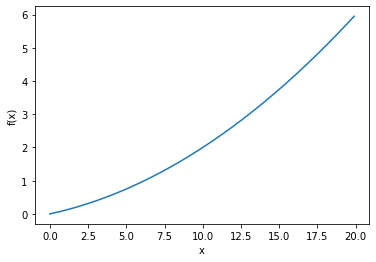

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [27]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/(2*h)

# x=5, x=10일 때 함수의 미분 -> 함수의 기울기
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


![접선_수치미분](접선_수치미분.png)

>> ##### 편미분
>> * 편미분: 변수가 여럿인 함수에 대한 미분
>> ![partial_diff_ex](partial_diff_ex.png)

In [28]:
def function_2(x):  # x: numpy array
    return x[0]**2 + x[1]**2

![partial_diff_ex_graph](partial_diff_ex_graph.png)

In [30]:
# 편미분 연습 1
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

print(numerical_diff(function_tmp1, 3.0))

6.00000000000378


In [31]:
# 편미분 연습 2
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

7.999999999999119


> ### **4.4** 기울기
> * 기울기: 모든 변수의 편미분을 벡터로 정리한 것

In [33]:
def numerical_gradient(f, x):   # f: function, x: numpy array
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같고, 원소가 모두 0인 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h)
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h)
        x[idx] = tmp_val-h
        fxh2 = f(x)

        grad[idx] = (fxh1-fxh2)/(2*h)
        x[idx] = tmp_val
    
    return grad

In [34]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


![gradient](gradient_1.png)

>> ##### 경사법 (경사 하강법)
>> * 기울기가 가리키는 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있음  
>> 따라서 최솟값 지점을 찾는 문제나 가능한 한 작은 값 지점을 찾는 문제에서는 기울기 정보를 단서로 나아갈 방향을 정해야 함
>> * 경사법: 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하고, 이동한 지점에서 기울기를 구하고, 그 기울어진 방향으로 나아가기를 반복, 함수의 값을 점차 줄이는 방법
>> ![gradient_descent](gradient_descent.png)

In [35]:
# gradient descent
def gradient_descent(f, init_x, lr=0.01, step_num=100): # f: 최적화하려는 함수, init_x: 초기값, lr: learning rate, step_num: 반복 횟수
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr*grad
    
    return x

In [36]:
# practice gradient descent
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]


![gradient_descent_graph](gradient_descent_graph.png)

In [37]:
# 학습률이 너무 클 때 -> 발산
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=10.0, step_num=100))

# 학습률이 너무 작을 때 -> 갱신되지 않은 채 끝남
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


>> ##### 신경망에서의 기울기
>> ![gradient_neural_network](gradient_neural_network_1.png)

In [38]:
# 신경망에서의 기울기
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):   # x: 입력 데이터, t: 정답 레이블
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [64]:
net = simpleNet()
print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))

t = np.array([0, 0, 1])
print(net.loss(x, t))

[[ 0.3180683   0.06962764  1.37375347]
 [-0.10906724  0.28794975  0.52204191]]
[0.09268046 0.30093136 1.2940898 ]
2
0.5135267824858393


In [65]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10798509  0.13298603 -0.24097112]
 [ 0.16197764  0.19947905 -0.36145669]]


> ### **4.5** 학습 알고리즘 구현하기
>
> 신경망 학습의 순서 (확률적 경사 하강법 stochastic gradient descent, SGD)
> * 1단계 - 미니배치  
> 훈련 데이터 중 일부를 무작위로 가져옴
>
> * 2단계 - 기울기 산출  
> 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시
>
> * 3단계 - 매개변수 갱신  
> 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
>
> * 4단계 - 반복  
>  1~3단계 반복
>
>> ##### 2층 신경망 클래스 구현하기
>> ![2layer_variable_methods](2layer_variable_methods.png)

In [14]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [5]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)

print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [6]:
x = np.random.rand(100, 784)    # 더미 입력 데이터 (100장)
y = net.predict(x)
t = np.random.rand(100, 10)    # 더미 정답 레이블 (100장)

grads = net.numerical_gradient(x, t)
print(grads['W1'].shape)
print(grads['W1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(784, 100)
(100, 10)
(10,)


>> ##### 미니배치 학습 구현하기

In [18]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울치 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

![mini_batch](mini_batch.png)

>> ##### 시험 데이터로 평가하기
>> * epoch: 단위, 1epoch = 학습에서 훈련 데이터를 모두 소진했을 때 횟수

In [17]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울치 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1epoch 당 정확도 계산
    if i%iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc: "+str(train_acc)+", "+str(test_acc))

train acc, test acc: 0.10218333333333333, 0.101
train acc, test acc: 0.7902833333333333, 0.7917
train acc, test acc: 0.8757, 0.8796
train acc, test acc: 0.89955, 0.9021
train acc, test acc: 0.9091166666666667, 0.9121
train acc, test acc: 0.9153833333333333, 0.9159
train acc, test acc: 0.92035, 0.9213
train acc, test acc: 0.9239333333333334, 0.9232
train acc, test acc: 0.9286166666666666, 0.9295
train acc, test acc: 0.9321666666666667, 0.9317
train acc, test acc: 0.93385, 0.9331
train acc, test acc: 0.9375166666666667, 0.936
train acc, test acc: 0.9395666666666667, 0.9384
train acc, test acc: 0.9419833333333333, 0.9389
train acc, test acc: 0.9447833333333333, 0.9421
train acc, test acc: 0.9461333333333334, 0.9437
train acc, test acc: 0.9478, 0.9451


![accuracy_graph](accuracy_graph_1.png)